# chrisbraun_ml Project Notebook
## Author: Chris Braun
### Link to repository : https://github.com/cbraun99-cyber/datafun-07-ml


In [2]:
# First Python cell - All imports (organized following conventions)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.precision', 2)

## Part 1 - Chart a Straight Line

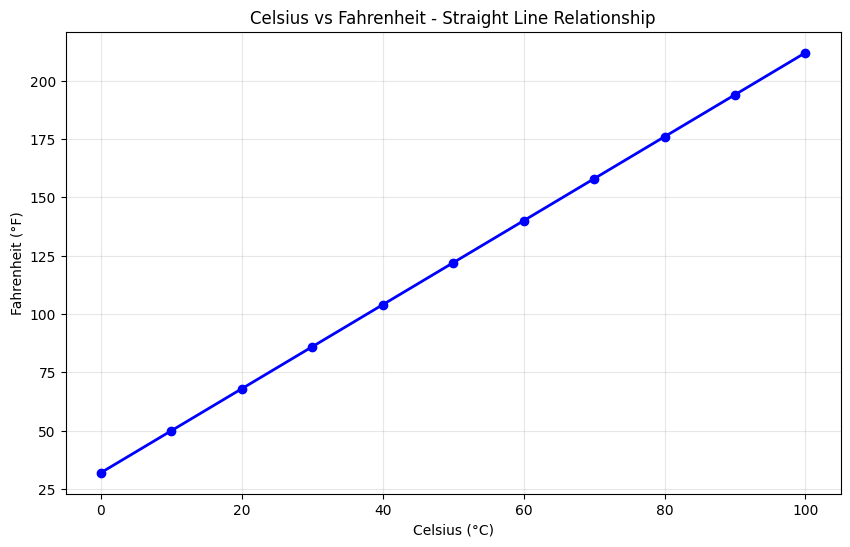

Equation: F = (9/5)C + 32
Slope (m): 1.80
Y-intercept (b): 32


In [3]:
# Create Celsius to Fahrenheit conversion data
celsius = np.arange(0, 101, 10)  # 0 to 100 in steps of 10
fahrenheit = (celsius * 9/5) + 32  # Conversion formula

# Create DataFrame
temp_df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})

# Plot the straight line
plt.figure(figsize=(10, 6))
plt.plot(temp_df['Celsius'], temp_df['Fahrenheit'], 'b-', linewidth=2, marker='o')
plt.title('Celsius vs Fahrenheit - Straight Line Relationship')
plt.xlabel('Celsius (°C)')
plt.ylabel('Fahrenheit (°F)')
plt.grid(True, alpha=0.3)
plt.show()

# Display the equation
print(f"Equation: F = (9/5)C + 32")
print(f"Slope (m): {9/5:.2f}")
print(f"Y-intercept (b): 32")